IBM HR Analytics Employee Attrition & Performance10

In [1]:
import numpy as np 
import pandas as pd
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.plotting import autocorrelation_plot

#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8 

import warnings # ignore warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading the single csv file to a variable named 'data'
HR=pd.read_csv("E:/github/IBM HR Analytics Employee Attrition & Performance/WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [3]:
#Lets look at a glimpse of table
HR.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


From the head of data we can clearly identify Attrition factor as the target/outcome variable and rest of the factors are predictor variables

In [4]:
#Lets look at no.of columns and information about its factors
print ("The shape of the  data is (row, column):"+ str(HR.shape))
print (HR.info())

The shape of the  data is (row, column):(1470, 35)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1

We have nearly 1470 records and 35 factors . We need to do a build a lot of models to get an accurate prediction

In [5]:
#Looking at the datatypes of each factor
HR.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

After loading the dataset we can see a number of things. These 35 columns provide a very rich amount of information for deep data exploration we can do on this dataset. We have 26 numerical data and 9 categorical data 

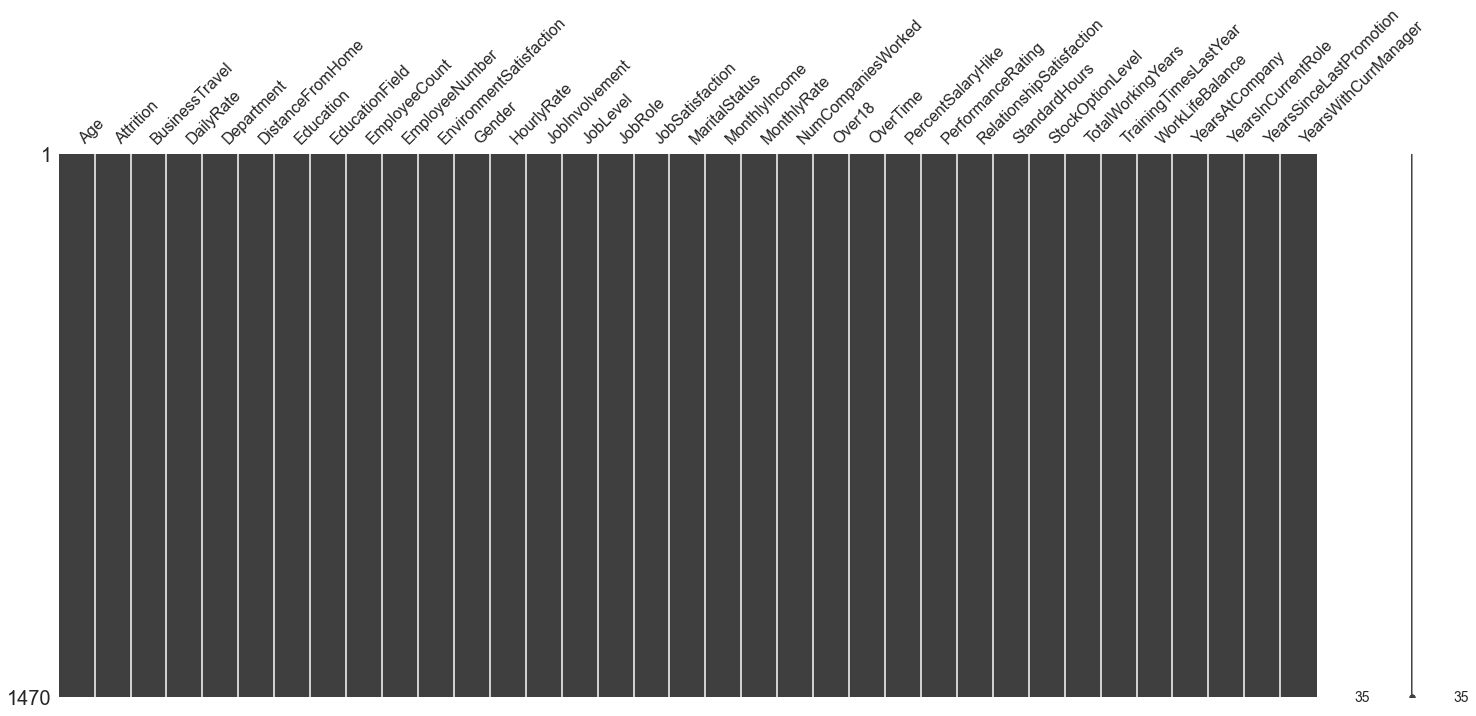

In [6]:
import missingno as msno 
msno.matrix(HR);

This data set seems to have no missing values,Phew. Now we don't need to clean or fill any NaN values, But lets confirm it numerically as well

In [7]:
print('Data columns with null values:',HR.isnull().sum(), sep = '\n')

Data columns with null values:
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCu

Let's look at the unique values of few factors

In [8]:
print("Gender classification:",HR.Gender.value_counts(),sep = '\n')
print("-"*40)
print("Business Travel:",HR.BusinessTravel.value_counts(),sep = '\n')
print("-"*40)
print("Departments:",HR.Department.value_counts(),sep = '\n')
print("-"*40)
print("Educational Field:",HR.EducationField.value_counts(),sep = '\n')
print("-"*40)
print("Job Roles:",HR.JobRole.value_counts(),sep = '\n')
print("-"*40)

Gender classification:
Male      882
Female    588
Name: Gender, dtype: int64
----------------------------------------
Business Travel:
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
----------------------------------------
Departments:
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
----------------------------------------
Educational Field:
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
----------------------------------------
Job Roles:
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources      

We got a little idea about what is in dataset, Lets start visualizing the data

Count of categorical Variable-Bar Chart

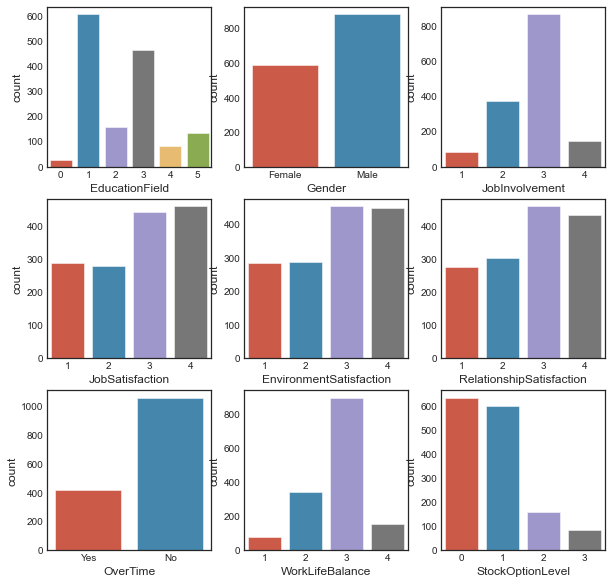

In [9]:
plt.figure(figsize = (15, 7))
plt.style.use('seaborn-white')
plt.subplot(331)
label = LabelEncoder()
HR['EducationField'] = label.fit_transform(HR['EducationField'])
sns.countplot(HR['EducationField'],)
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(332)
sns.countplot(HR['Gender'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(333)
sns.countplot(HR['JobInvolvement'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(334)
sns.countplot(HR.JobSatisfaction)
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(335)
sns.countplot(HR.EnvironmentSatisfaction)
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(336)
sns.countplot(HR.RelationshipSatisfaction)
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(337)
sns.countplot(HR.OverTime)
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(338)
sns.countplot(HR.WorkLifeBalance)
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(339)
sns.countplot(HR.StockOptionLevel)
fig = plt.gcf()
fig.set_size_inches(10,10)


Inferences:

    Candidates who has done their bachelor degree are employeed more
    There are more male employees
    Majority of the employees show greater involvement
    Majority of the employees are showing greater satisfaction(Job,Environment,Relationship)
    Only few employees work overtime
    Majority of the employees seem to handle their Work Life Balance well
    Majority of the employees have zero stocks in the company


Visualizing Distribution of features

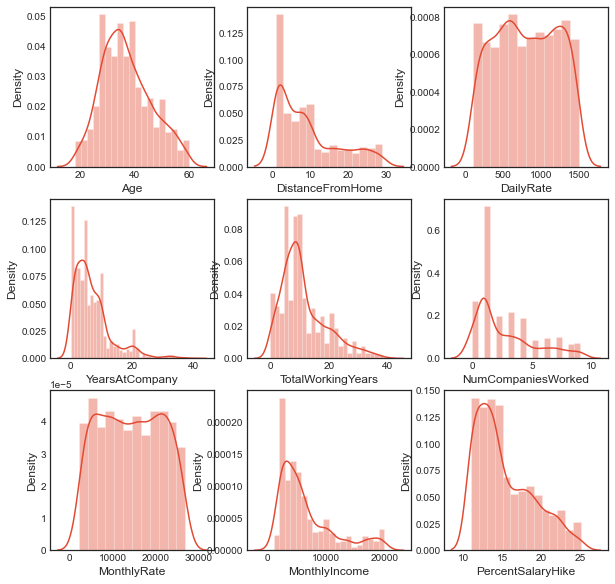

In [10]:
plt.figure(figsize = (15, 7))
plt.style.use('seaborn-white')
plt.subplot(331)
sns.distplot(HR['Age'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(332)
sns.distplot(HR['DistanceFromHome'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(333)
sns.distplot(HR['DailyRate'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(334)
sns.distplot(HR['YearsAtCompany'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(335)
sns.distplot(HR['TotalWorkingYears'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(336)
sns.distplot(HR['NumCompaniesWorked'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(337)
sns.distplot(HR['MonthlyRate'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(338)
sns.distplot(HR['MonthlyIncome'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(339)
sns.distplot(HR['PercentSalaryHike'])
fig = plt.gcf()
fig.set_size_inches(10,10)

Inference:

    Monthly and Daily Rates has proportional normal distribution
    Most of the features except age parameter are right skewed


Age Distribution-Histogram

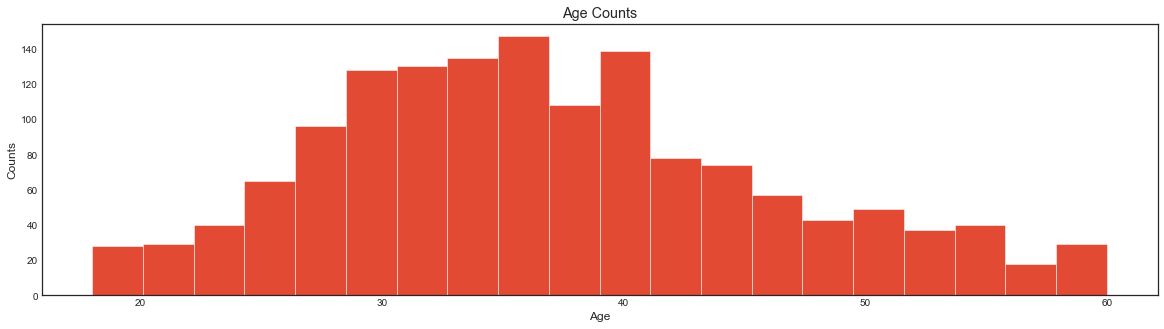

In [11]:
plt.figure(figsize=(20,5))
plt.hist(HR.Age,bins=20)
plt.xlabel("Age")
plt.ylabel("Counts")
plt.title("Age Counts")
plt.show()

From the age distribution histogram, we can conclude that employees aged between 30-40 are working in IBM

Department Distribution-Pie Chart

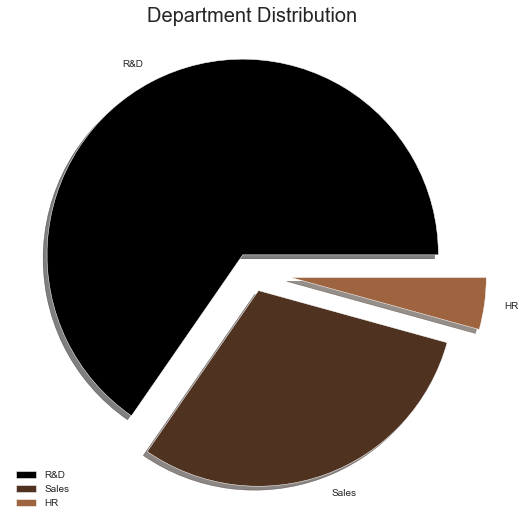

In [12]:
# Code forked from- https://www.kaggle.com/roshansharma/fifa-data-visualization
labels = ['R&D', 'Sales', 'HR']
sizes = HR['Department'].value_counts()
colors = plt.cm.copper(np.linspace(0, 1, 5))
explode = [0.1, 0.1, 0.2]

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(sizes, labels = labels, colors = colors, explode = explode, shadow = True)
plt.title('Department Distribution', fontsize = 20)
plt.legend()
plt.show()

The given dataset has majority of employees from Research and Development followed by Sales and HR department

Distribution of Salary across Job Roles-Boxplot

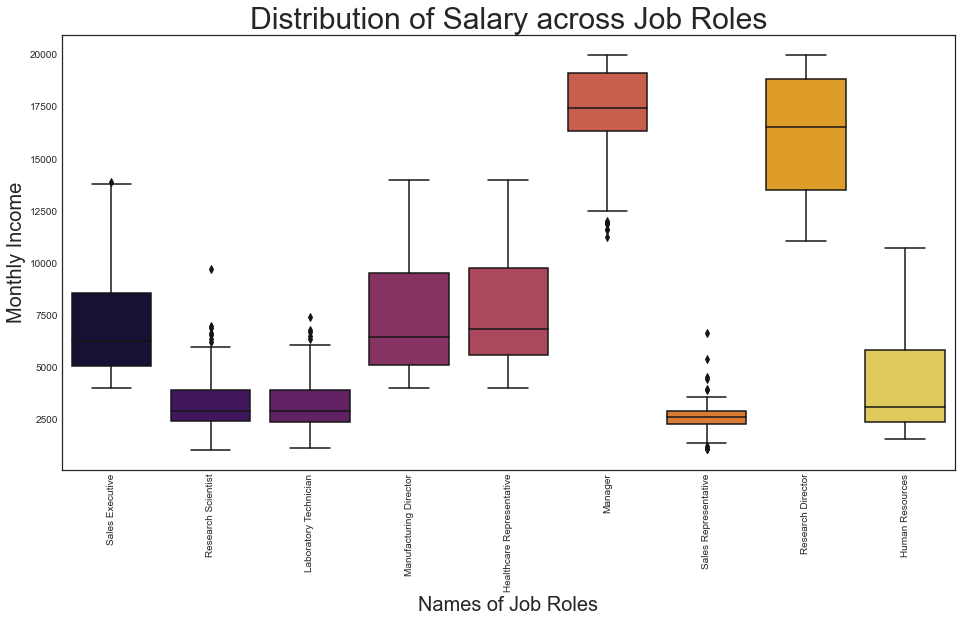

In [13]:
plt.rcParams['figure.figsize'] = (16, 8)
ax = sns.boxplot(x = HR['JobRole'], y =HR['MonthlyIncome'], data = HR, palette = 'inferno')
ax.set_xlabel(xlabel = 'Names of Job Roles', fontsize = 20)
ax.set_ylabel(ylabel = 'Monthly Income', fontsize = 20)
ax.set_title(label = 'Distribution of Salary across Job Roles', fontsize = 30)
plt.xticks(rotation = 90)
plt.show()


Inference

    Highest average monthly income(17500) is given to Managers
    Lowest average monthly income(2500) is given to Sales Representative, But there are many outliers in Sales Representative income
    Research Scientist, Laboratory Technician and HR gets almost same average income


Relationship with working years and income- Joint & lm Plot

<Figure size 720x360 with 0 Axes>

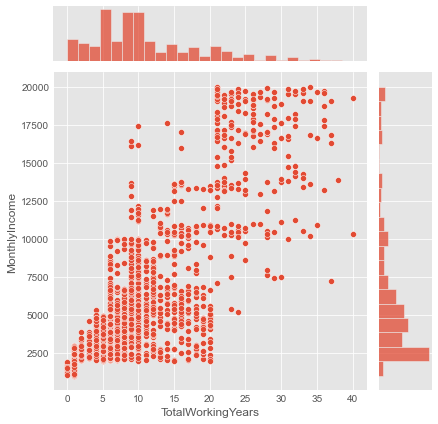

In [14]:
plt.figure(figsize=(10,5))
plt.style.use('ggplot')
sns.jointplot(x='TotalWorkingYears', y='MonthlyIncome', data=HR)

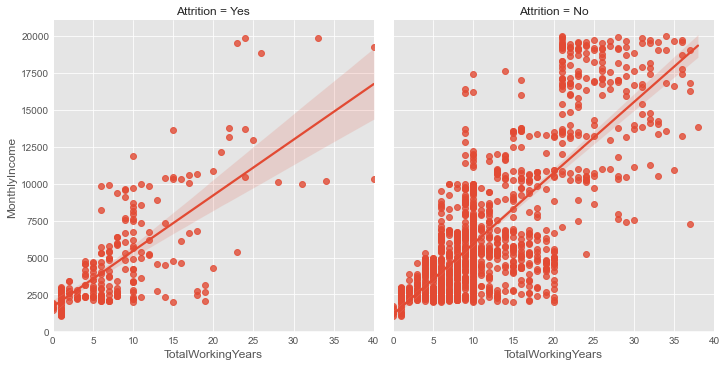

In [15]:
sns.lmplot(x = 'TotalWorkingYears', y = 'MonthlyIncome', data = HR, col = 'Attrition')
plt.show()


Inference

    Employees who had less working years were receiving comparitively lower salary
    There are many fresher employees working in IBM
    Most of the employees who got laid off had less working years(fresher and junior level) and they were receiving less salary
    Very few people from senior category and receiving higher income got laid off


Relationship of predictor factors with Attrition-Swarm Plot

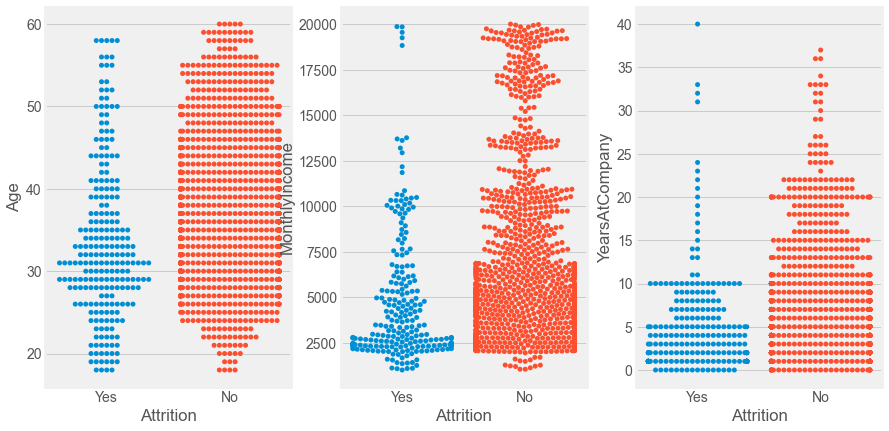

In [16]:
plt.figure(figsize = (15, 7))
plt.style.use('fivethirtyeight')
plt.subplot(131)
sns.swarmplot(x="Attrition", y="Age", data=HR)
plt.subplot(132)
sns.swarmplot(x="Attrition", y="MonthlyIncome", data=HR)
plt.subplot(133)
sns.swarmplot(x="Attrition", y="YearsAtCompany", data=HR)


Inference

    Employees within the age band of 25-35 were laid off at a huge rate
    Employees who were receiving less monthly income(2500-5000) were laid off
    Employees who had less working years(0-5) in the company were laid off


Gender vs Monthly Income

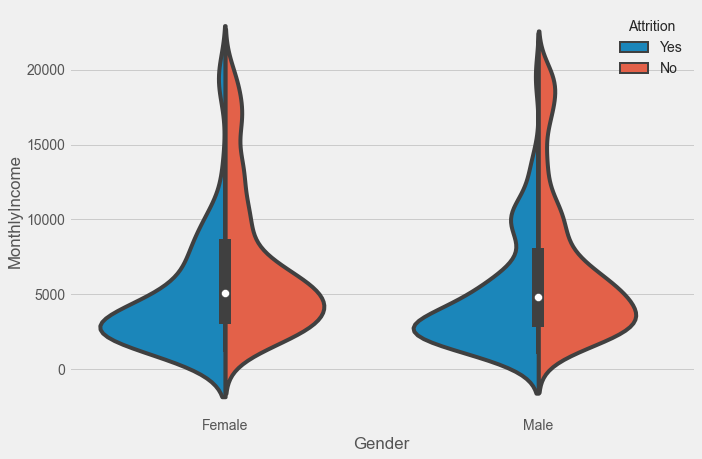

In [17]:
fig,ax = plt.subplots(figsize=(10,7))
sns.violinplot(x='Gender', y='MonthlyIncome',hue='Attrition',split=True,data=HR)


Inference

    Both the genders weren't discriminated in income and the attrition is at the same rate in both the cases


Relationship with Age and Monthly income-Pair plot

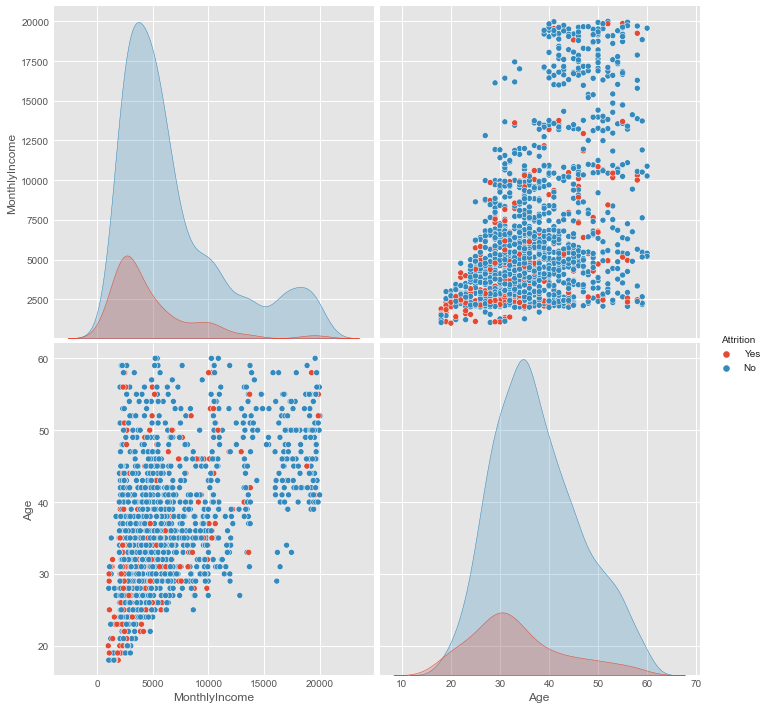

In [18]:
plt.style.use('ggplot')
g = sns.pairplot(HR, vars=["MonthlyIncome", "Age"],hue="Attrition",size=5)


Inference

    The Income band widens for elder employees between 40-60 years of age and the income band restricts to 10000 for 20-30 year old employees
    The employee who were laid off falll under low income(5000-1000) and young age(20-30) category


Correlation between Factors- Heatmap

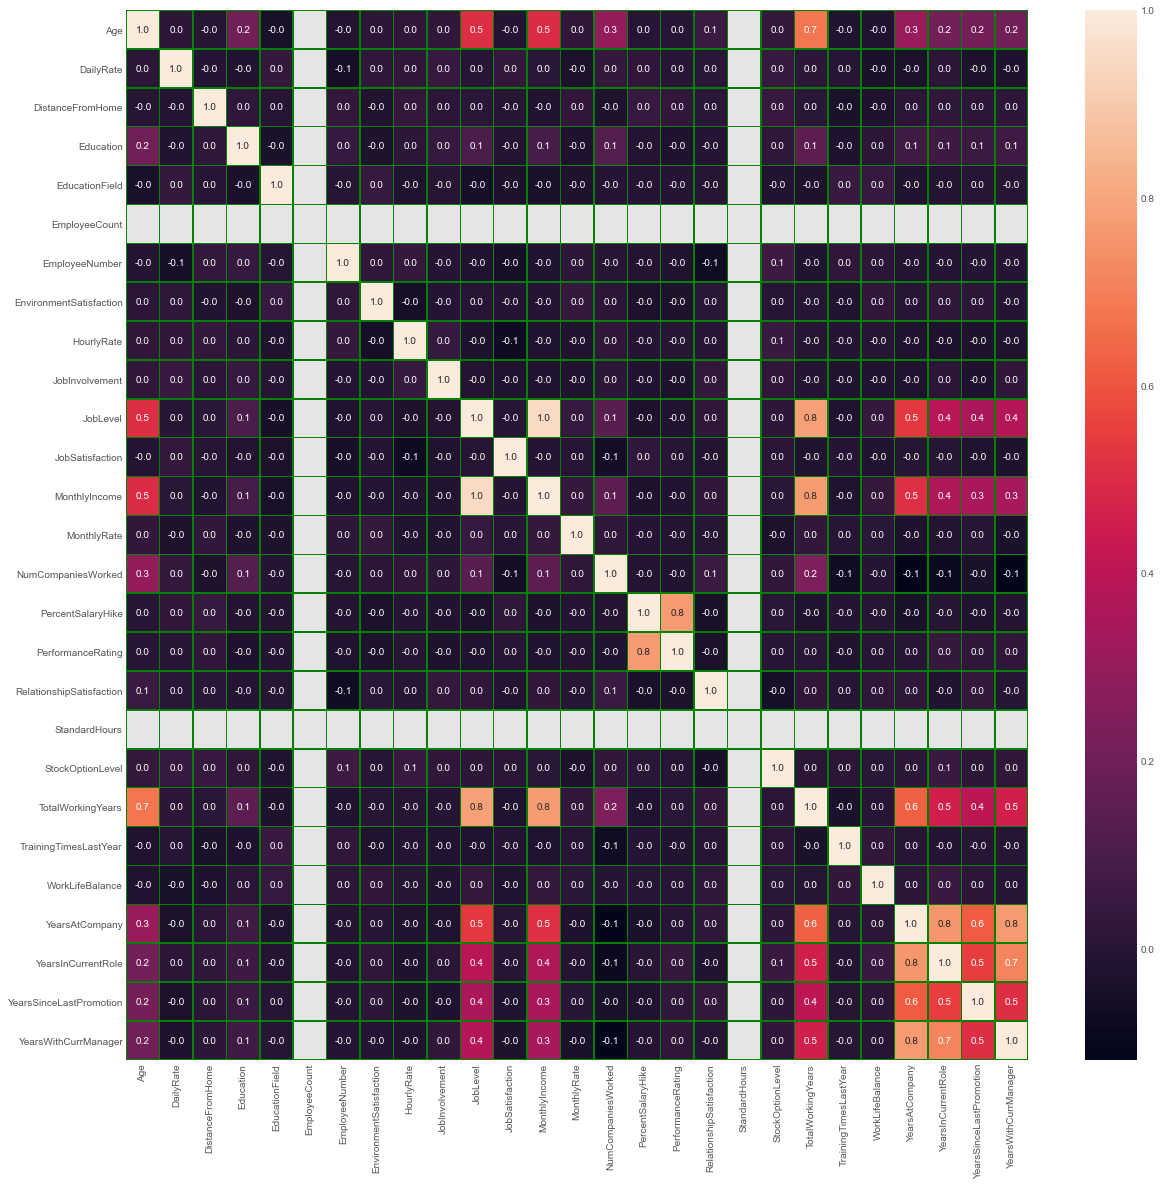

In [19]:
f,ax=plt.subplots(figsize=(18,18))
sns.heatmap(HR.corr(),annot=True,linewidths=0.5,linecolor="green",fmt=".1f",ax=ax)
plt.show()


Inference- The band which has lighter colour has high correlation

    Boxes in lower right corner have high correlation,but those are relationship between their working period which obviously correlates and has nothing to aid for our objective, so we neglect that
    Job level and Monthly income has perfect positive correlation which means higher the job level, better the income
    Also Job level has high correlation with Working years, when the employyee's year of working increases he/she is being promoted based on seniority
    There is also a high correlation between Monthly Income and Total working years which depicts that employees earn higher income owing to their seniority with the firm


Encoding the Categorical Variables

In [20]:
s = (HR.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['Attrition', 'BusinessTravel', 'Department', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']


Encoding the categorical data with the help of LabelEncoder() function gifted by sci-kit learn package !

In [21]:
from sklearn.preprocessing import LabelEncoder

# Make copy to avoid changing original data 
label_data = HR.copy()

# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
for col in object_cols:
    label_data[col] = label_encoder.fit_transform(HR[col])

In [22]:
s = (label_data.dtypes == 'object')
print(list(s[s].index))

[]


we don't have any categorical values in our dataset. Let's look at the top records to see it visually

In [23]:
label_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2


perfect numericals to feed our models. Now, let us split input and output variables

Setting feature and target variable

In [24]:
data_features=['Age','EnvironmentSatisfaction',
               'Gender','JobInvolvement', 'JobLevel', 'JobRole',
               'JobSatisfaction','MonthlyIncome','PerformanceRating',
               'TotalWorkingYears','YearsAtCompany','OverTime']
X=label_data[data_features]
y=label_data.Attrition

Our goal is to check whether an employee got laid off or not. So we assume Attrition as our target(y) and rest of the features as predictor variables(X)

Pipelines and Random Forest Regressor

In [25]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline

my_pipeline = Pipeline(steps=[('model', RandomForestRegressor(n_estimators=50,
                                                              random_state=0))])


Calculating MAE(Mean Absolute Error)

Mean Absolute Error is a model evaluation metric used with regression models. The mean absolute error of a model with respect to a test set is the mean of the absolute values of the individual prediction errors on over all instances in the test set. Each prediction error is the difference between the true value and the predicted value for the instance.


In [26]:
from sklearn.model_selection import cross_val_score

# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(my_pipeline, X, y,
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", scores)
print("Average MAE score (across experiments):",scores.mean())

MAE scores:
 [0.2285034  0.20687075 0.23870748 0.22183673 0.20802721]
Average MAE score (across experiments): 0.22078911564625853


Great we have an average error of 0.22

Data leakage refers to a mistake make by the creator of a machine learning model in which they accidentally share information between the test and training data-sets. Typically, when splitting a data-set into testing and training sets, the goal is to ensure that no data is shared between the two

We use 5 folds cross validation score and check for the model accuracy

In [27]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Since there is no preprocessing, we don't need a pipeline (used anyway as best practice!)
my_pipeline = make_pipeline(RandomForestClassifier(n_estimators=100))
cv_scores = cross_val_score(my_pipeline, X, y, 
                            cv=5,
                            scoring='accuracy')

print("Cross-validation accuracy: %f" % cv_scores.mean())

Cross-validation accuracy: 0.855102


85% accuracy. Not great, Not terrible. Lets look at improving the validation accuracy

Dropping potential leakage features

In [28]:
# Drop leaky predictors from dataset
potential_leaks = ['EnvironmentSatisfaction', 'JobSatisfaction', 'PerformanceRating', 'JobInvolvement']
X2 = X.drop(potential_leaks, axis=1)

# Evaluate the model with leaky predictors removed
cv_scores = cross_val_score(my_pipeline, X2, y, 
                            cv=5,
                            scoring='accuracy')

print("Cross-val accuracy: %f" % cv_scores.mean())

Cross-val accuracy: 0.842177


83% accuracy

Splitting into training and test dataset

In [29]:
from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

In [30]:
val_y.head()

1291    1
1153    1
720     1
763     0
976     0
Name: Attrition, dtype: int32

Logistic regression is a supervised learning classification algorithm used to predict the probability of a target variable. The nature of target or dependent variable is dichotomous, which means there would be only two possible classes. Mathematically, a logistic regression model predicts P(Y=1) as a function of X.

In [31]:
#Code forked from -https://www.kaggle.com/vanshjatana/applied-machine-learning
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter = 500000)
model.fit(train_X, train_y)
y_pred = model.predict(val_X)
accuracy = model.score(val_X, val_y)
print(accuracy)

0.8369565217391305


82% accuracy for our Logistic Regression model. 

Decision Tree is a decision-making tool that uses a flowchart-like tree structure or is a model of decisions and all of their possible results, including outcomes, input costs and utility.Decision-tree algorithm falls under the category of supervised learning algorithms. It works for both continuous as well as categorical output variables. Now we are creating the function directly to get Mean Absolute error to fasten up our coding

In [32]:
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor

def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

In [33]:
# compare MAE with differing values of max_leaf_nodes
for max_leaf_nodes in [5, 50, 500, 5000]:
    my_mae = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))

Max leaf nodes: 5  		 Mean Absolute Error:  0
Max leaf nodes: 50  		 Mean Absolute Error:  0
Max leaf nodes: 500  		 Mean Absolute Error:  0
Max leaf nodes: 5000  		 Mean Absolute Error:  0


A Random Forest is an ensemble technique capable of performing both regression and classification tasks with the use of multiple decision trees and a technique called Bootstrap Aggregation, commonly known as bagging. The basic idea behind this is to combine multiple decision trees in determining the final output rather than relying on individual decision trees.

In [34]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# function for comparing different approaches
def score_dataset(train_X, val_X, train_y, val_y):
    model = RandomForestRegressor(n_estimators=100, random_state=0)
    model.fit(train_X, train_y)
    preds = model.predict(val_X)
    return mean_absolute_error(val_y, preds)

In [35]:
print("Mean Absolute error of the Model:")
print(score_dataset(train_X, val_X, train_y, val_y))

Mean Absolute error of the Model:
0.23236413043478263


MAE of 0.2 . Great, Now lets boost our model using XGBoost

XGBoost is an algorithm that has recently been dominating applied machine learning and Kaggle competitions for structured or tabular data. XGBoost is an implementation of gradient boosted decision trees designed for speed and performance

In [36]:
from xgboost import XGBRegressor

my_model = XGBRegressor(n_estimators=1000, learning_rate=0.05, n_jobs=4)
my_model.fit(train_X, train_y, 
             early_stopping_rounds=5, 
             eval_set=[(val_X, val_y)], 
             verbose=False)
predictions = my_model.predict(val_X)
print("Mean Absolute Error: " + str(mean_absolute_error(predictions, val_y)))

Mean Absolute Error: 0.24217862819584654


MAE of 0.24

A confusion matrix is a table that is often used to describe the performance of a classification model (or “classifier”) on a set of test data for which the true values are known. It allows the visualization of the performance of an algorithm.

In [37]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(val_y, predictions.round())
conf_matrix

array([[287,  13],
       [ 48,  20]], dtype=int64)

The confusion matrix output is not clear and doesn't satisfy us, So let's make it visually beautiful

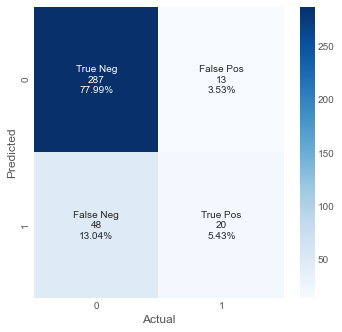

In [38]:
plt.subplots(figsize=(5,5))
group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ['{0:0.0f}'.format(value) for value in conf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in conf_matrix.flatten()/np.sum(conf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_matrix, annot=labels, fmt='', cmap='Blues')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()


Inference from Confusion matrix

    The model has mostly predicted the employees who weren't laid off - True Negative
    But it had a minor flaw, as nearly 13.04% became False Negative( which means the model has said employees were laid off when they weren't)
    The model has 5.43% of correct prediction when the employees where actually laid off- True Positive
    Nearly 3.53% of predictions where False Positive when the model predicted the employees weren't laid off when they actually were


In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [40]:
df = pd.read_csv("E:/github/IBM HR Analytics Employee Attrition & Performance/WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [42]:
pd.set_option("display.float_format", "{:.2f}".format)
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,...,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00
mean,36.92,802.49,9.19,2.91,1.00,1024.87,2.72,65.89,2.73,2.06,...,2.71,80.00,0.79,11.28,2.80,2.76,7.01,4.23,2.19,4.12
std,9.14,403.51,8.11,1.02,0.00,602.02,1.09,20.33,0.71,1.11,...,1.08,0.00,0.85,7.78,1.29,0.71,6.13,3.62,3.22,3.57
min,18.00,102.00,1.00,1.00,1.00,1.00,1.00,30.00,1.00,1.00,...,1.00,80.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
25%,30.00,465.00,2.00,2.00,1.00,491.25,2.00,48.00,2.00,1.00,...,2.00,80.00,0.00,6.00,2.00,2.00,3.00,2.00,0.00,2.00
50%,36.00,802.00,7.00,3.00,1.00,1020.50,3.00,66.00,3.00,2.00,...,3.00,80.00,1.00,10.00,3.00,3.00,5.00,3.00,1.00,3.00
75%,43.00,1157.00,14.00,4.00,1.00,1555.75,4.00,83.75,3.00,3.00,...,4.00,80.00,1.00,15.00,3.00,3.00,9.00,7.00,3.00,7.00
max,60.00,1499.00,29.00,5.00,1.00,2068.00,4.00,100.00,4.00,5.00,...,4.00,80.00,3.00,40.00,6.00,4.00,40.00,18.00,15.00,17.00


In [43]:
df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis="columns", inplace=True)

In [44]:
categorical_col = []
for column in df.columns:
    if df[column].dtype == object and len(df[column].unique()) <= 50:
        categorical_col.append(column)
        print(f"{column} : {df[column].unique()}")
        print("====================================")

Attrition : ['Yes' 'No']
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department : ['Sales' 'Research & Development' 'Human Resources']
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Gender : ['Female' 'Male']
JobRole : ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
MaritalStatus : ['Single' 'Married' 'Divorced']
OverTime : ['Yes' 'No']


In [45]:
df['Attrition'] = df.Attrition.astype("category").cat.codes

In [46]:
df.Attrition.value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

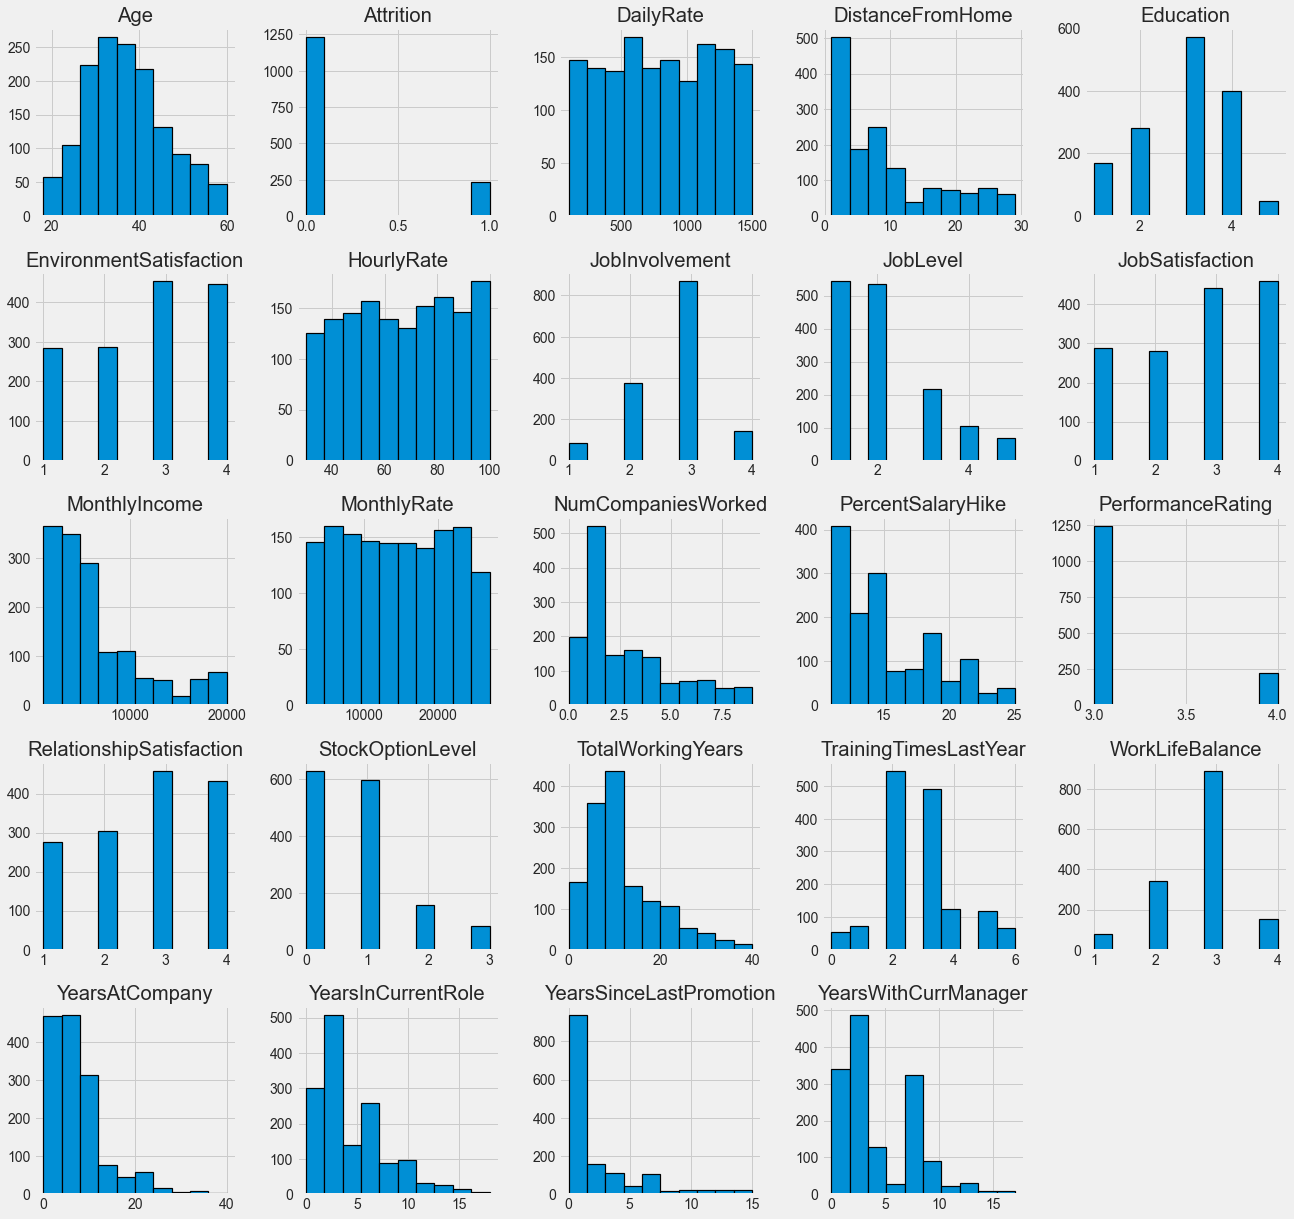

In [47]:
# Visulazing the distibution of the data for every feature
df.hist(edgecolor='black', linewidth=1.2, figsize=(20, 20));

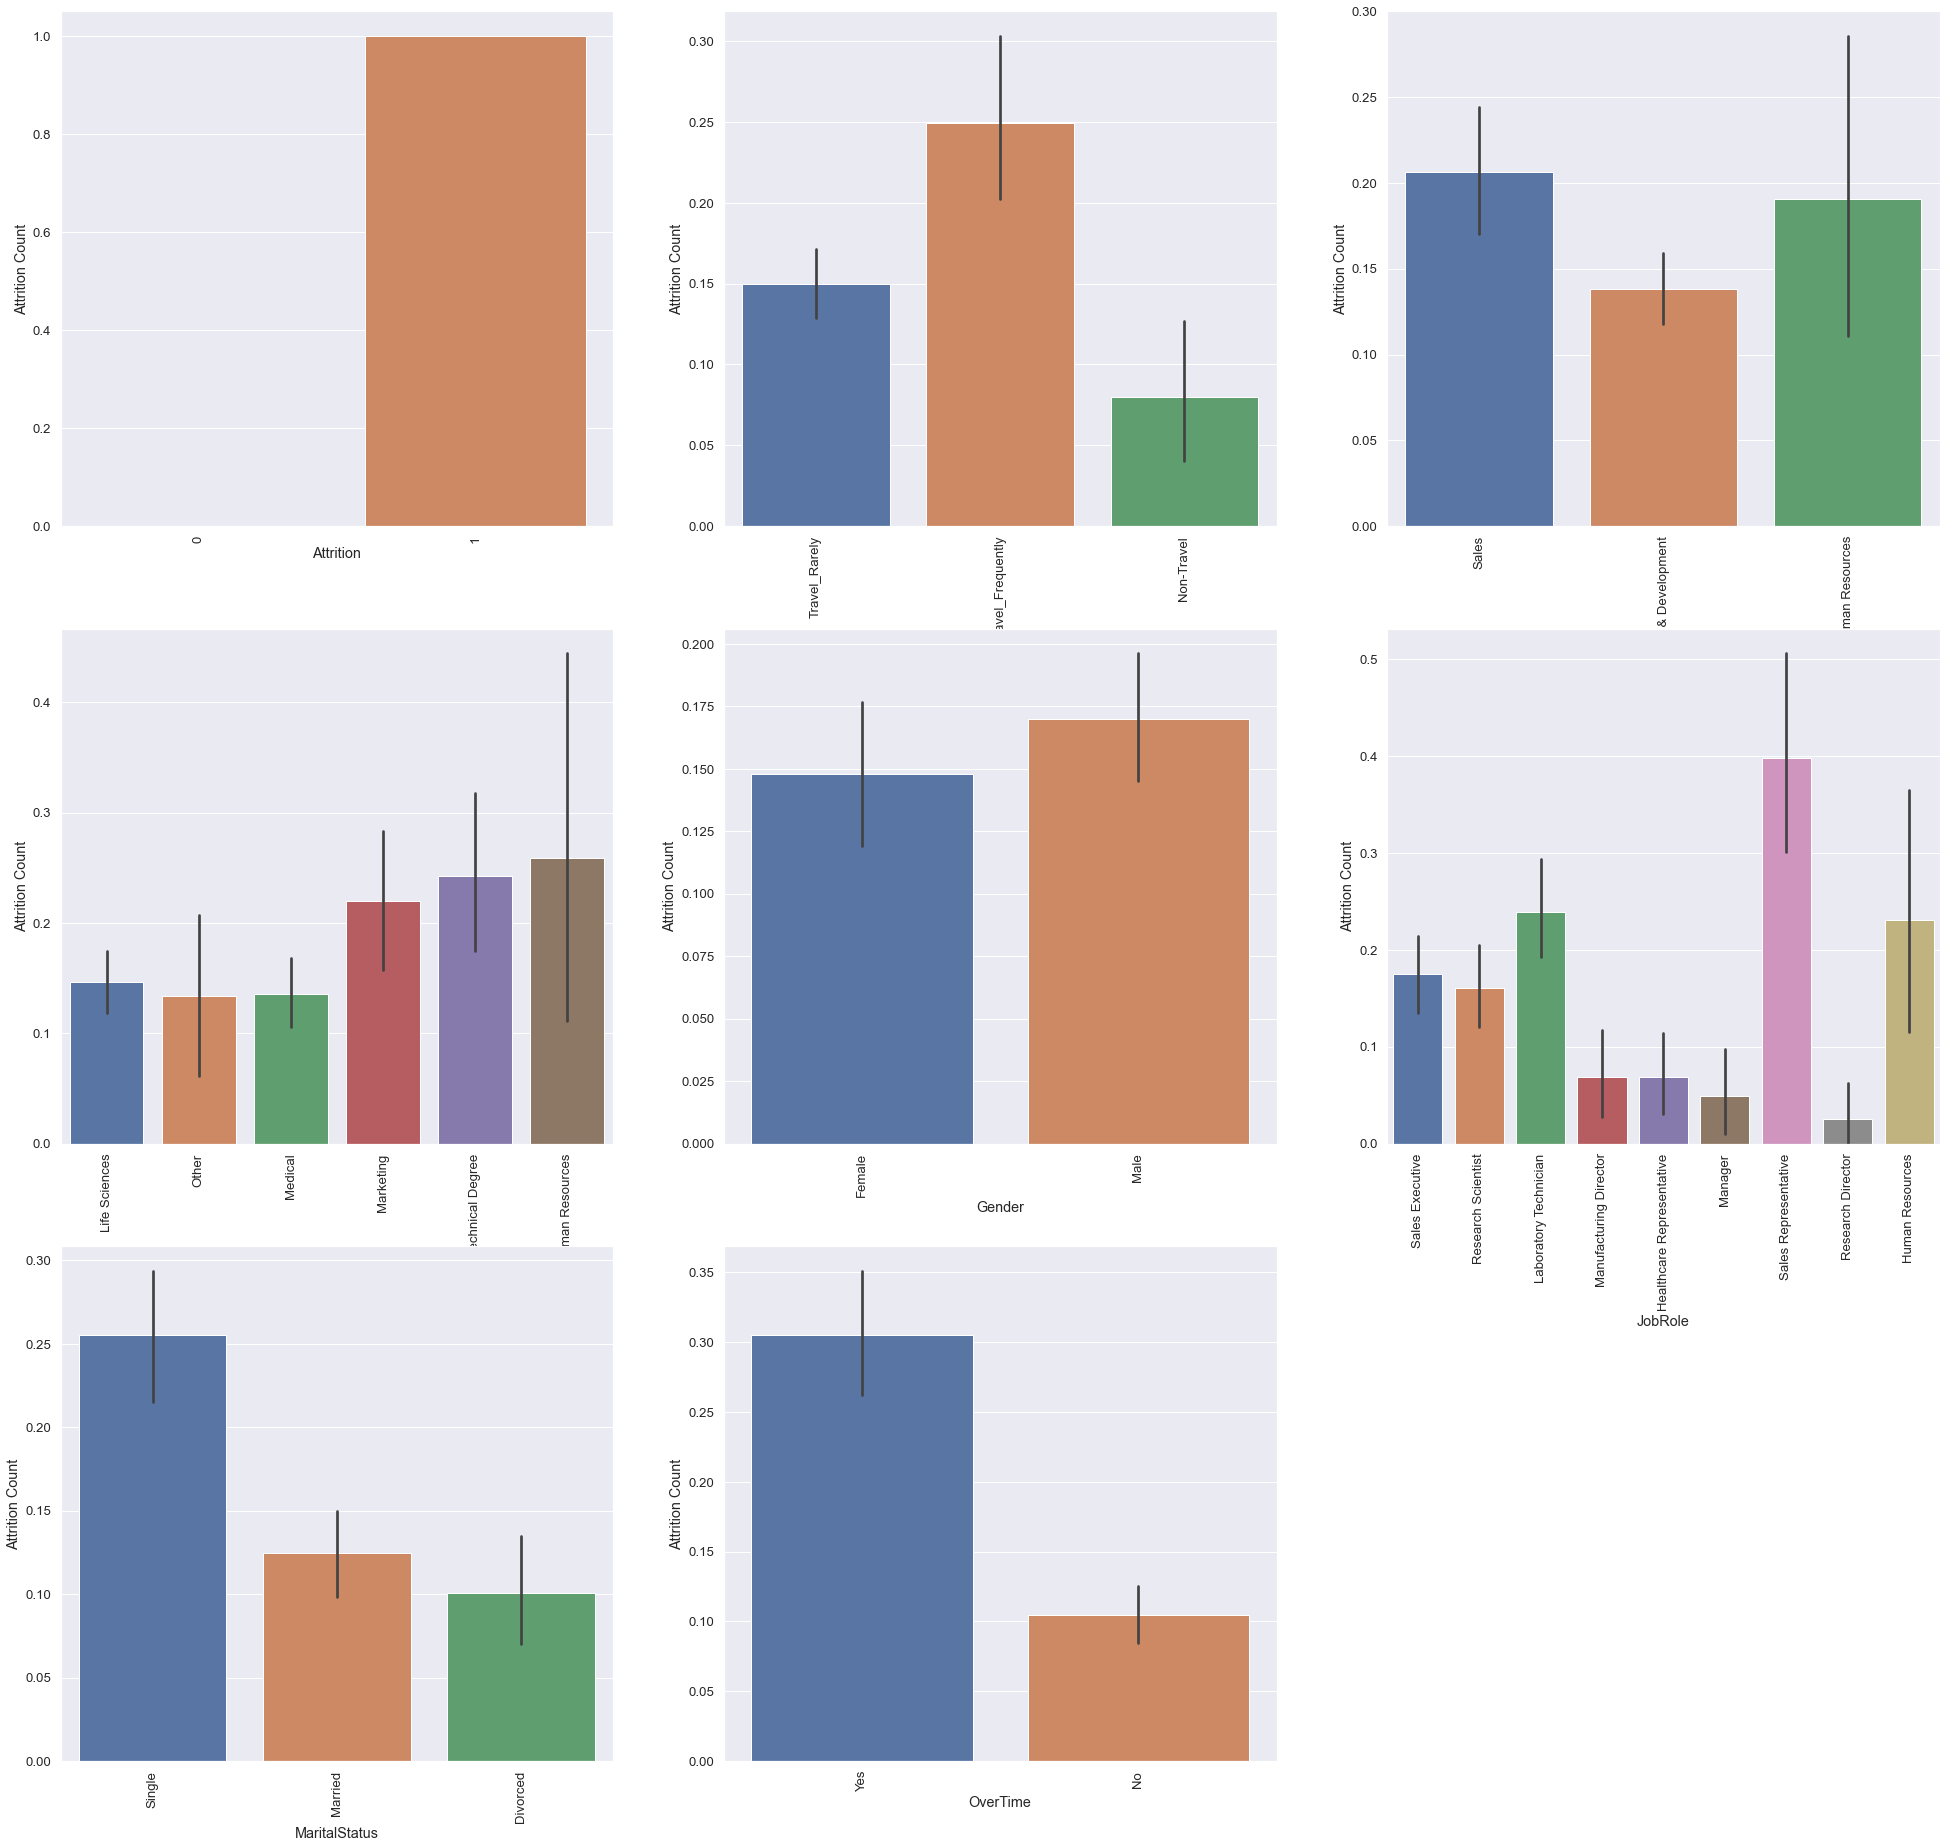

In [48]:
# Plotting how every feature correlate with the "target"
sns.set(font_scale=1.2)
plt.figure(figsize=(30, 30))

for i, column in enumerate(categorical_col, 1):
    plt.subplot(3, 3, i)
    g = sns.barplot(x=f"{column}", y='Attrition', data=df)
    g.set_xticklabels(g.get_xticklabels(), rotation=90)
    plt.ylabel('Attrition Count')
    plt.xlabel(f'{column}')

Conclusions:

    BusinessTravel : The workers who travel alot are more likely to quit then other employees.

    Department : The worker in Research & Development are more likely to stay then the workers on other departement.

    EducationField : The workers with Human Resources and Technical Degree are more likely to quit then employees from other fields of educations.

    Gender : The Male are more likely to quit.

    JobRole : The workers in Laboratory Technician, Sales Representative, and Human Resources are more likely to quit the workers in other positions.

    MaritalStatus : The workers who have Single marital status are more likely to quit the Married, and Divorced.

    OverTime : The workers who work more hours are likely to quit then others.


Correlation Matrix

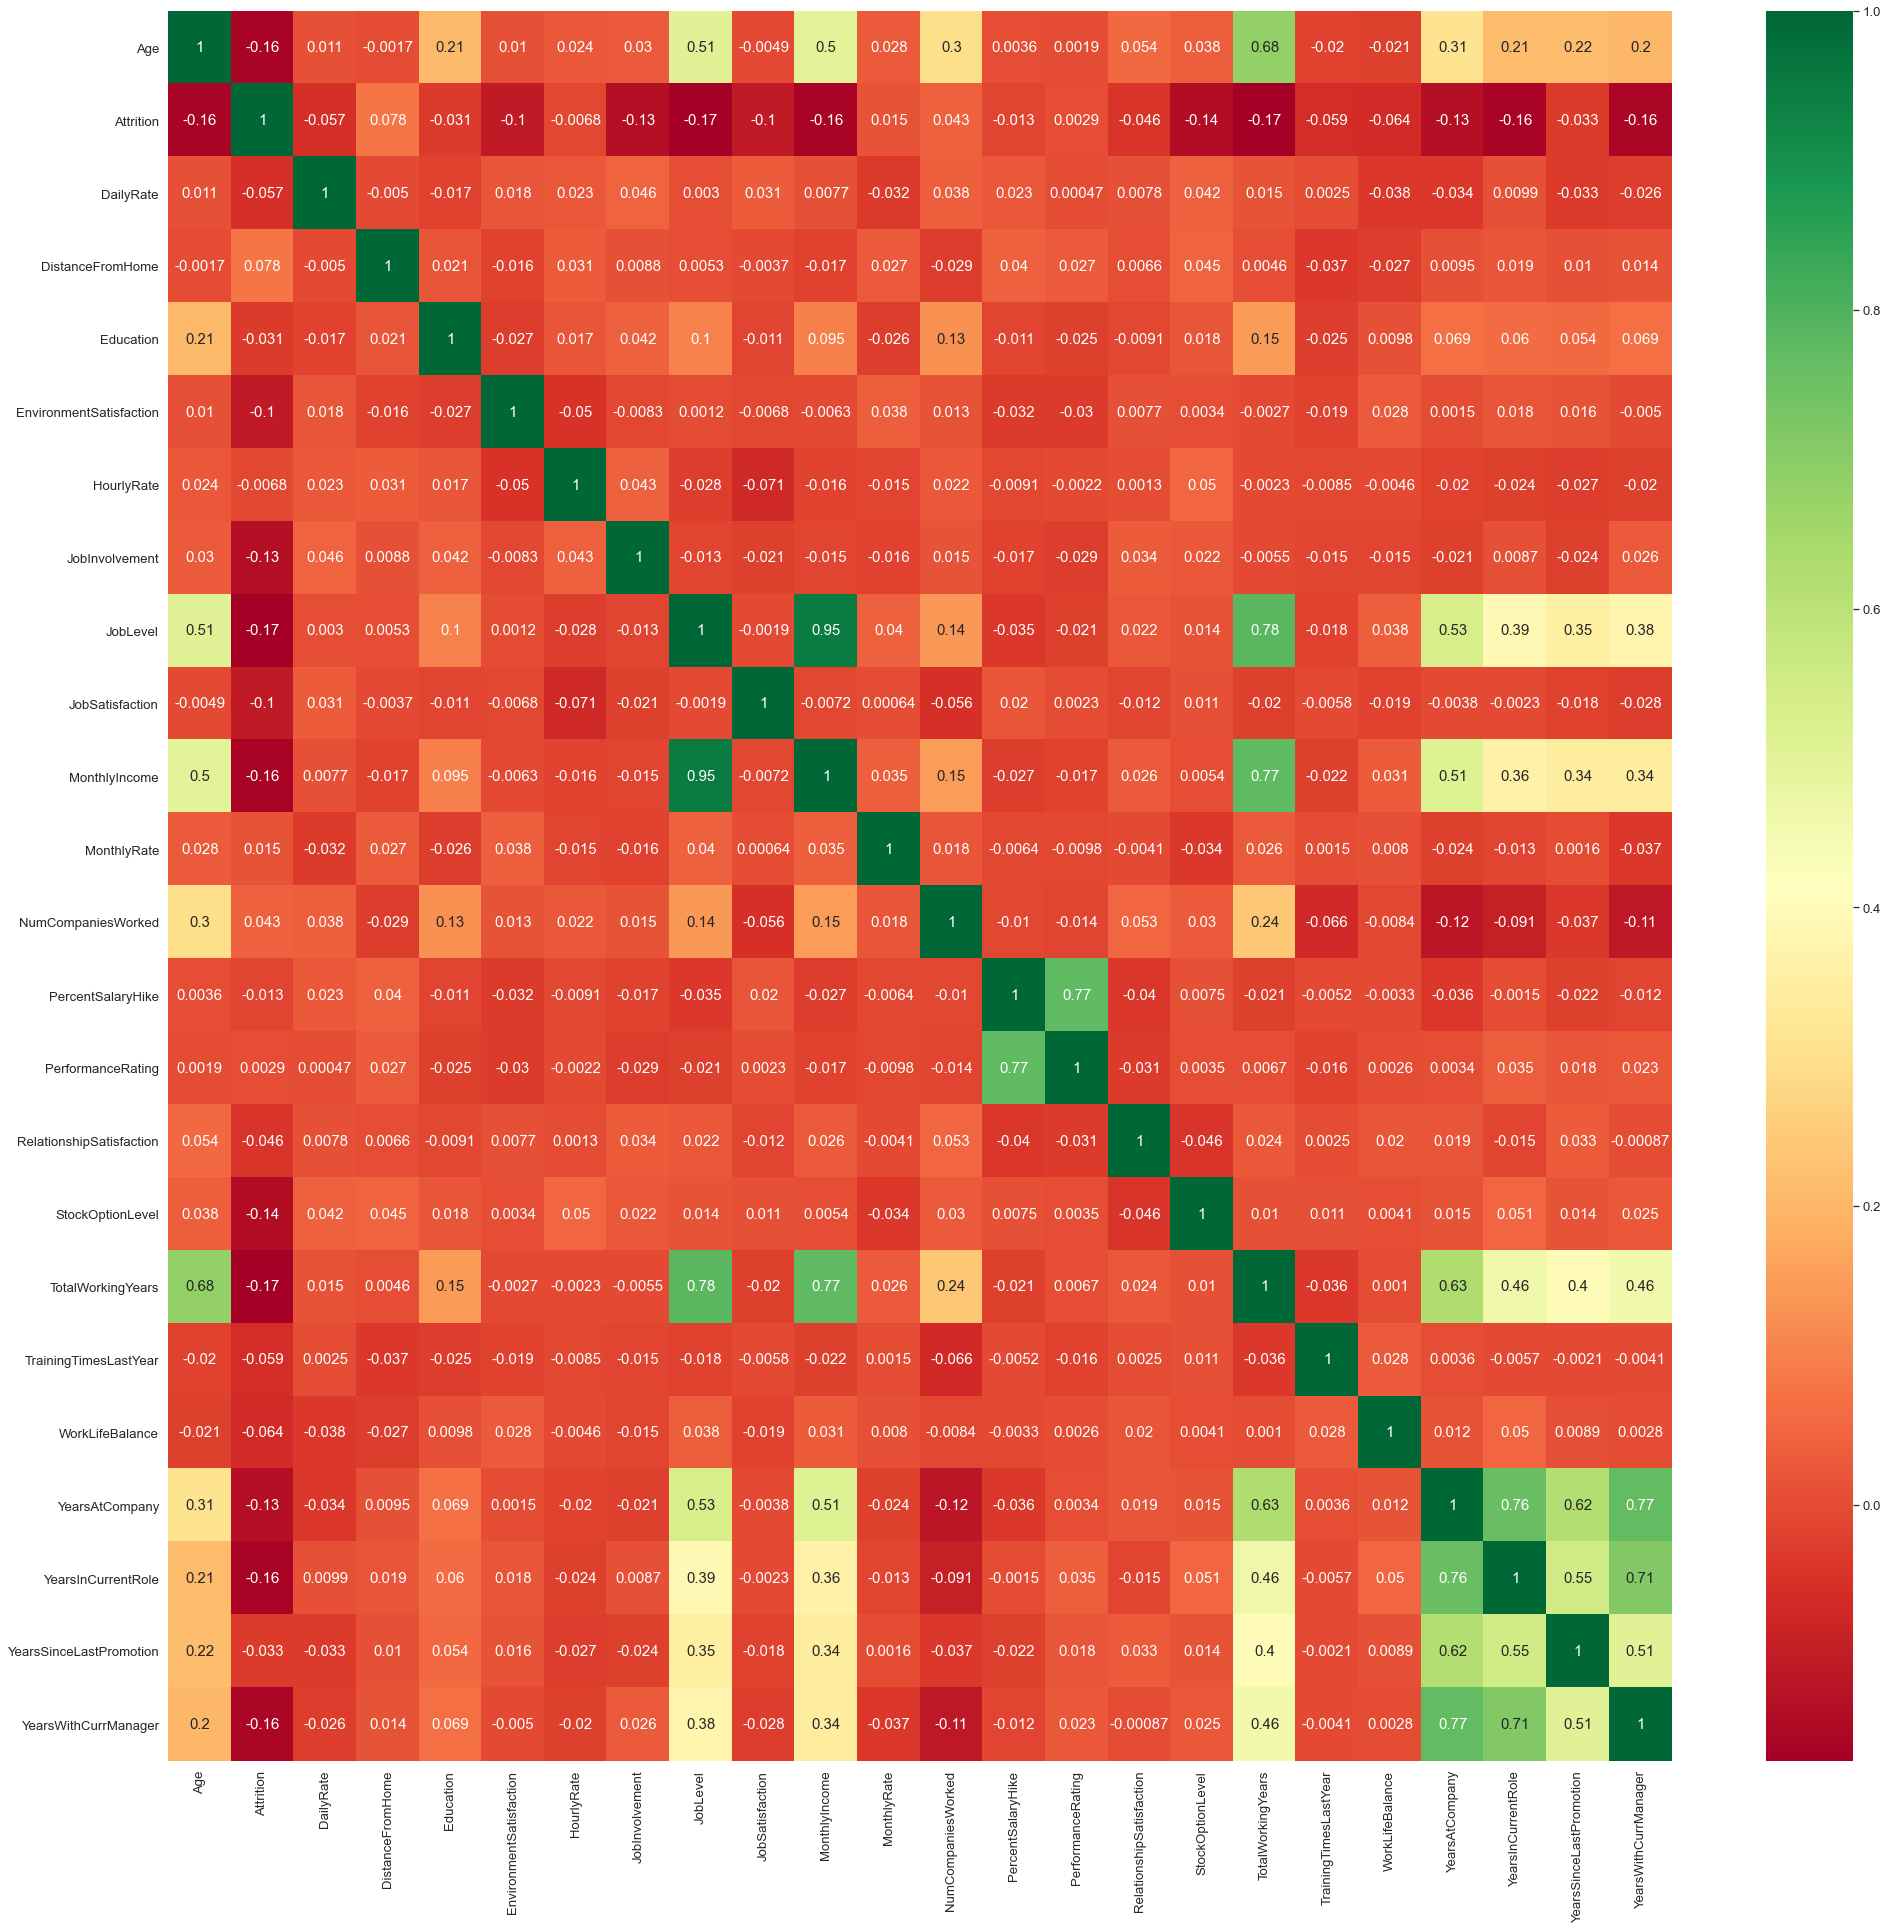

In [49]:
plt.figure(figsize=(30, 30))
sns.heatmap(df.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})

In [50]:
categorical_col.remove('Attrition')

In [51]:
# Transform categorical data into dummies
# categorical_col.remove("Attrition")
# data = pd.get_dummies(df, columns=categorical_col)
# data.info()
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
for column in categorical_col:
    df[column] = label.fit_transform(df[column])

In [52]:
from sklearn.model_selection import train_test_split

X = df.drop('Attrition', axis=1)
y = df.Attrition

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Applying machine learning algorithms

In [53]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

Decision Tree parameters:

    criterion: The function to measure the quality of a split. Supported criteria are "gini" for the Gini impurity and "entropy" for the information gain.

    splitter: The strategy used to choose the split at each node. Supported strategies are "best" to choose the best split and "random" to choose the best random split.

    max_depth: The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

    min_samples_split: The minimum number of samples required to split an internal node.

    min_samples_leaf: The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.

    min_weight_fraction_leaf: The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node. Samples have equal weight when sample_weight is not provided.

    max_features: The number of features to consider when looking for the best split.

    max_leaf_nodes: Grow a tree with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.

    min_impurity_decrease: A node will be split if this split induces a decrease of the impurity greater than or equal to this value.

    min_impurity_split: Threshold for early stopping in tree growth. A node will split if its impurity is above the threshold, otherwise it is a leaf.


In [54]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   1.00   1.00      1.00       1.00          1.00
recall      1.00   1.00      1.00       1.00          1.00
f1-score    1.00   1.00      1.00       1.00          1.00
support   853.00 176.00      1.00    1029.00       1029.00
_______________________________________________
Confusion Matrix: 
 [[853   0]
 [  0 176]]

Test Result:
Accuracy Score: 77.78%
_______________________________________________
CLASSIFICATION REPORT:
               0     1  accuracy  macro avg  weighted avg
precision   0.89  0.26      0.78       0.57          0.80
recall      0.85  0.33      0.78       0.59          0.78
f1-score    0.87  0.29      0.78       0.58          0.79
support   380.00 61.00      0.78     441.00        441.00
_______________________________________________
Confusion Matrix: 
 [[323  57]
 [ 41  20]]



Decision Tree Classifier Hyperparameter tuning

In [55]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

params = {
    "criterion":("gini", "entropy"), 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 20))), 
    "min_samples_split":[2, 3, 4], 
    "min_samples_leaf":list(range(1, 20)), 
}


tree_clf = DecisionTreeClassifier(random_state=42)
tree_cv = GridSearchCV(tree_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)
tree_cv.fit(X_train, y_train)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")

tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(X_train, y_train)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 3 folds for each of 4332 candidates, totalling 12996 fits
Best paramters: {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 10, 'min_samples_split': 2, 'splitter': 'best'})
Train Result:
Accuracy Score: 88.82%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.91   0.75      0.89       0.83          0.88
recall      0.96   0.52      0.89       0.74          0.89
f1-score    0.93   0.61      0.89       0.77          0.88
support   853.00 176.00      0.89    1029.00       1029.00
_______________________________________________
Confusion Matrix: 
 [[823  30]
 [ 85  91]]

Test Result:
Accuracy Score: 85.49%
_______________________________________________
CLASSIFICATION REPORT:
               0     1  accuracy  macro avg  weighted avg
precision   0.89  0.46      0.85       0.68          0.83
recall      0.94  0.30      0.85       0.62          0.85
f1-score    0.92  0.36      0.85

Visualization of a tree

In [56]:
from IPython.display import Image
import six
import sys
sys.modules['sklearn.externals.six'] = six
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydot

features = list(df.columns)
features.remove("Attrition")

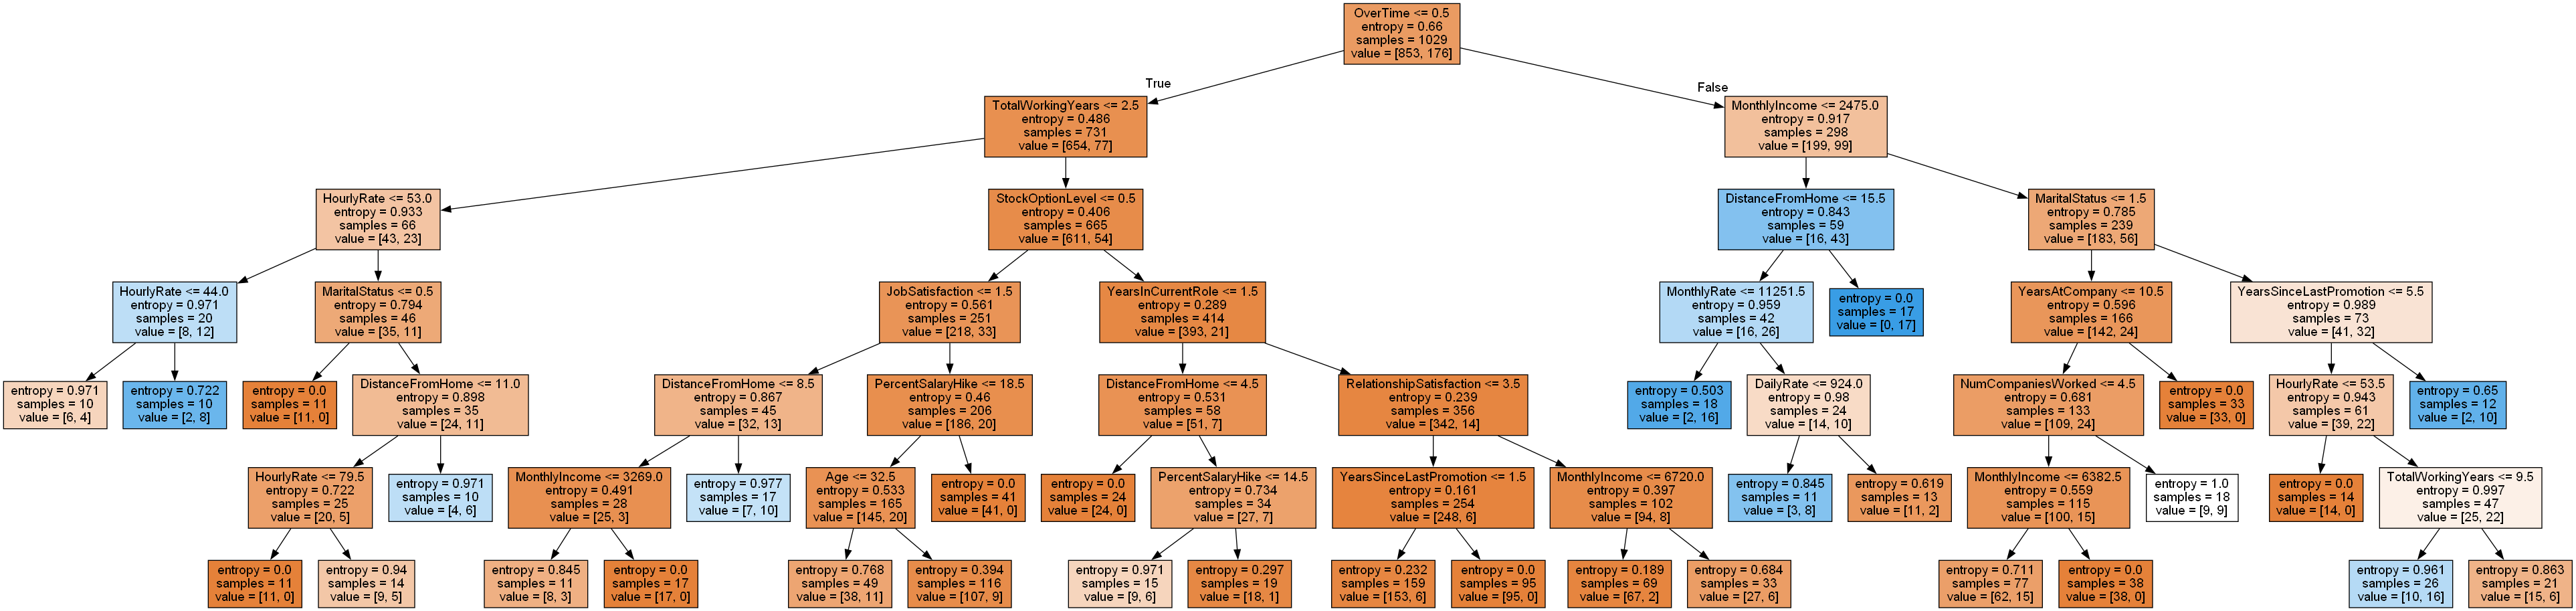

In [57]:
dot_data = StringIO()
export_graphviz(tree_clf, out_file=dot_data, feature_names=features, filled=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

    Random forest algorithm parameters:
    n_estimators: The number of trees in the forest.

    criterion: The function to measure the quality of a split. Supported criteria are "gini" for the Gini impurity and "entropy" for the information gain.

    max_depth: The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

    min_samples_split: The minimum number of samples required to split an internal node.

    min_samples_leaf: The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.

    min_weight_fraction_leaf: The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node. Samples have equal weight when sample_weight is not provided.

    max_features: The number of features to consider when looking for the best split.

    max_leaf_nodes: Grow a tree with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.

    min_impurity_decrease: A node will be split if this split induces a decrease of the impurity greater than or equal to this value.

    min_impurity_split: Threshold for early stopping in tree growth. A node will split if its impurity is above the threshold, otherwise it is a leaf.

    bootstrap: Whether bootstrap samples are used when building trees. If False, the whole datset is used to build each tree.

    oob_score: Whether to use out-of-bag samples to estimate the generalization accuracy.


In [58]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   1.00   1.00      1.00       1.00          1.00
recall      1.00   1.00      1.00       1.00          1.00
f1-score    1.00   1.00      1.00       1.00          1.00
support   853.00 176.00      1.00    1029.00       1029.00
_______________________________________________
Confusion Matrix: 
 [[853   0]
 [  0 176]]

Test Result:
Accuracy Score: 86.62%
_______________________________________________
CLASSIFICATION REPORT:
               0     1  accuracy  macro avg  weighted avg
precision   0.87  0.60      0.87       0.74          0.83
recall      0.99  0.10      0.87       0.54          0.87
f1-score    0.93  0.17      0.87       0.55          0.82
support   380.00 61.00      0.87     441.00        441.00
_______________________________________________
Confusion Matrix: 
 [[376   4]
 [ 55   6]]



Randomized Search Cross Validation

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rf_clf = RandomForestClassifier(random_state=42)

rf_cv = RandomizedSearchCV(estimator=rf_clf, scoring='f1',param_distributions=random_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)

rf_cv.fit(X_train, y_train)
rf_best_params = rf_cv.best_params_
print(f"Best paramters: {rf_best_params})")

rf_clf = RandomForestClassifier(**rf_best_params)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters: {'n_estimators': 400, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 90, 'bootstrap': False})
Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   1.00   1.00      1.00       1.00          1.00
recall      1.00   1.00      1.00       1.00          1.00
f1-score    1.00   1.00      1.00       1.00          1.00
support   853.00 176.00      1.00    1029.00       1029.00
_______________________________________________
Confusion Matrix: 
 [[853   0]
 [  0 176]]

Test Result:
Accuracy Score: 86.62%
_______________________________________________
CLASSIFICATION REPORT:
               0     1  accuracy  macro avg  weighted avg
precision   0.87  0.58      0.87       0.73          0.83
recall      0.99  0.11      0.87       0.55          0.87
f1-score    0

Random search allowed us to narrow down the range for each hyperparameter. Now that we know where to concentrate our search, we can explicitly specify every combination of settings to try. We do this with GridSearchCV, a method that, instead of sampling randomly from a distribution, evaluates all combinations we define.

Grid Search Cross Validation

In [60]:
n_estimators = [100, 500, 1000, 1500]
max_features = ['auto', 'sqrt']
max_depth = [2, 3, 5]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4, 10]
bootstrap = [True, False]

params_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rf_clf = RandomForestClassifier(random_state=42)

rf_cv = GridSearchCV(rf_clf, params_grid, scoring="f1", cv=3, verbose=2, n_jobs=-1)


rf_cv.fit(X_train, y_train)
best_params = rf_cv.best_params_
print(f"Best parameters: {best_params}")

rf_clf = RandomForestClassifier(**best_params)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 3 folds for each of 768 candidates, totalling 2304 fits
Best parameters: {'bootstrap': False, 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 1500}
Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   1.00   1.00      1.00       1.00          1.00
recall      1.00   1.00      1.00       1.00          1.00
f1-score    1.00   1.00      1.00       1.00          1.00
support   853.00 176.00      1.00    1029.00       1029.00
_______________________________________________
Confusion Matrix: 
 [[853   0]
 [  0 176]]

Test Result:
Accuracy Score: 86.17%
_______________________________________________
CLASSIFICATION REPORT:
               0     1  accuracy  macro avg  weighted avg
precision   0.87  0.50      0.86       0.69          0.82
recall      0.98  0.10      0.86       0.54          0.86
f1-score 

Summary

    Decsion tree and random forest algorithms and the parameters of each algorithm.
    How to tune hyperparameters for both Decision tree and Random Forest.
    Balance your dataset before training to prevent the tree from being biased toward the classes that are dominant.
        By sampling an equal number of samples from each class
        By normalizing the sum of the sample weights (sample_weight) for each class to the same value.
